In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import json
import pickle

from sklearn.metrics import mean_absolute_error, mean_squared_error

mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
def read_pickle(path):
    infile = open(path,'rb')
    file = pickle.load(infile)
    infile.close()
    return file

In [3]:
c2g_data = pd.read_csv('data/interpol/c2g_interpol_demand.csv', index_col=0)
c2g_data.travels.describe()

count    9932.000000
mean      147.048480
std       110.461143
min         1.000000
25%        47.836812
50%       132.797316
75%       222.250000
max       575.000000
Name: travels, dtype: float64

In [4]:
y_hat_12Hrs_cat, y_12Hrs_cat = read_pickle(r'results/Magazine Results/catboost/auto_feed_results.p')
y_hat_week_cat, y_week_cat = read_pickle(r'results/Magazine Results/catboost/future_period_results.p')

y_hat_12Hrs_lgb, y_12Hrs_lgb = read_pickle(r'results/Magazine Results/light_gbm/auto_feed_results.p')
y_hat_week_lgb, y_week_lgb = read_pickle(r'results/Magazine Results/light_gbm/future_period_results.p')

y_hat_12Hrs_xgb, y_12Hrs_xgb = read_pickle(r'results/Magazine Results/xgboost/auto_feed_results.p')
y_hat_week_xgb, y_week_xgb = read_pickle(r'results/Magazine Results/xgboost/future_period_results.p')

y_hat_12Hrs_arima, y_12Hrs_arima = read_pickle(r'results/Magazine Results/arima/auto_feed_results.p')
y_hat_week_arima, y_week_arima = read_pickle(r'results/Magazine Results/arima/future_period_results.p')

y_hat_12Hrs_sarima, y_12Hrs_sarima = read_pickle(r'results/Magazine Results/sarima/auto_feed_results.p')
y_hat_week_sarima, y_week_sarima = read_pickle(r'results/Magazine Results/sarima/future_period_results.p')

y_hat_12Hrs_prophet, y_12Hrs_prophet = read_pickle(r'results/Magazine Results/prophet/auto_feed_results.p')
y_hat_week_prophet, y_week_prophet = read_pickle(r'results/Magazine Results/prophet/future_period_results.p')


y_hat_12Hrs_lstm, y_12Hrs_lstm = np.load(r'results/Magazine Results/LSTM_Univariable_12Hrs_Predictions.npy', allow_pickle=True)
y_hat_week_lstm, y_week_lstm = np.load(r'results/Magazine Results/LSTM_Univariable_SS_Week_Predictions.npy', allow_pickle=True)
y_hat_direct_week_lstm, y_direct_week_lstm = np.load(r'results/Magazine Results/LSTM_Multivariable_Direct_One_Week_Predictions.npy', allow_pickle=True)

In [23]:
y_week_cat[0,:]

array([129.87513778,  88.3006602 ,  58.18981407,  31.46858289,
        17.19975229,   9.27541835,  12.92500306,  39.16148667,
        79.36171199, 149.0575236 , 201.88910352, 180.46130346,
       142.10091622, 131.82099773, 137.79587818, 152.72000073,
       166.35370162, 194.72316679, 233.20550095, 280.69861455,
       296.5111972 , 284.94980188, 239.10907384, 193.42190313,
       149.21553352, 103.7160159 ,  62.60271591,  33.51617384,
        17.4043536 ,  10.72397341,  11.42807999,  29.04832677,
        73.44808623, 152.5661636 , 216.2371224 , 210.6046275 ,
       173.03510115, 136.4271824 , 145.12958969, 158.38950055,
       170.4677751 , 192.64682869, 239.218039  , 289.95992931,
       315.03400312, 311.8985672 , 262.35145148, 201.55491755,
       176.36501659, 122.73207315,  74.38828869,  42.20384215,
        21.05392517,  12.42112146,  11.1278037 ,  22.53441398,
        68.98012941, 155.51530575, 222.70668503, 226.62811253,
       189.76641578, 143.60027177, 152.96295553, 162.69

# Plots

In [26]:
def plot_subplot(ax, y_hat, y, name):
    ax.plot(y_hat[0])
    ax.plot(y[0])
    ax.set_title(name)

In [37]:
print(y_hat_week_cat[:36, 0])
print(y_week_lstm[:36, 0])

[151 125  80  54  28  21  18  31  49  86  68 153 155 156 195 187 180 226
 200 232 268 256 242 149 172 142  92  59  32  20  17  32  53  69  87 137]
[232. 268. 256. 242. 149. 172. 142.  92.  59.  32.  20.  17.  32.  53.
  69.  87. 137. 158. 168. 176. 177. 181. 220. 219. 230. 221. 209. 150.
 180. 125.  98.  83.  35.  28.  16.  15.]


## Sample Plots

C:\Users\lrpes\Anaconda3\envs\CarSharingEnv\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


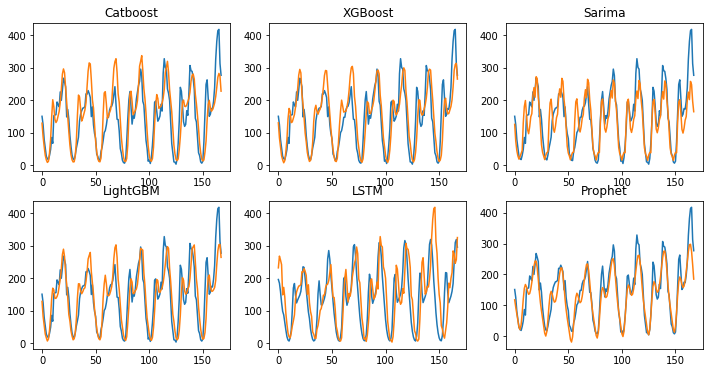

In [30]:
# Week Prediction Example
fig, axs = plt.subplots(2, 3)
axs[0,0].plot(y_hat_week_cat[0])
axs[0,0].plot(y_week_cat[0])
axs[0,0].set_title('Catboost')
axs[1,0].plot(y_hat_week_lgb[0])
axs[1,0].plot(y_week_lgb[0])
axs[1,0].set_title('LightGBM')
axs[0,1].plot(y_hat_week_xgb[0])
axs[0,1].plot(y_week_xgb[0])
axs[0,1].set_title('XGBoost')
axs[1,2].plot(y_hat_week_prophet[0])
axs[1,2].plot(y_week_prophet[0])
axs[1,2].set_title("Prophet")
axs[0,2].plot(y_hat_week_sarima[0])
axs[0,2].plot(y_week_sarima[0])
axs[0,2].set_title("Sarima")
axs[1,1].plot(y_hat_week_lstm[0])
axs[1,1].plot(y_week_lstm[0])
axs[1,1].set_title("LSTM")
fig.show()

C:\Users\lrpes\Anaconda3\envs\CarSharingEnv\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


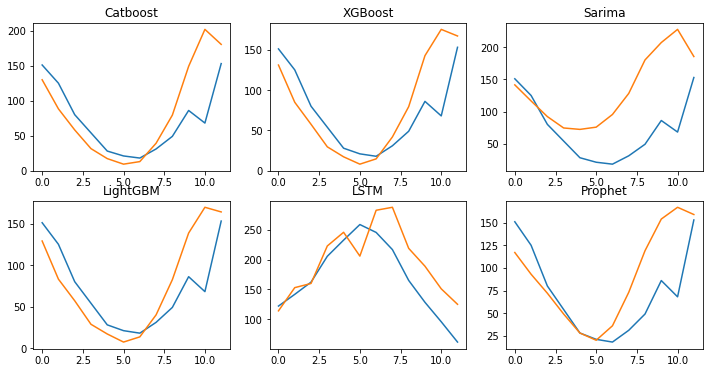

In [32]:
# Week Prediction Example
fig, axs = plt.subplots(2, 3)
axs[0,0].plot(y_hat_12Hrs_cat[0])
axs[0,0].plot(y_12Hrs_cat[0])
axs[0,0].set_title('Catboost')
axs[1,0].plot(y_hat_12Hrs_lgb[0])
axs[1,0].plot(y_12Hrs_lgb[0])
axs[1,0].set_title('LightGBM')
axs[0,1].plot(y_hat_12Hrs_xgb[0])
axs[0,1].plot(y_12Hrs_xgb[0])
axs[0,1].set_title('XGBoost')
axs[1,2].plot(y_hat_12Hrs_prophet[0])
axs[1,2].plot(y_12Hrs_prophet[0])
axs[1,2].set_title("Prophet")
axs[0,2].plot(y_hat_12Hrs_sarima[0, :12])
axs[0,2].plot(y_12Hrs_sarima[0])
axs[0,2].set_title("Sarima")
axs[1,1].plot(y_hat_12Hrs_lstm[0])
axs[1,1].plot(y_12Hrs_lstm[0])
axs[1,1].set_title("LSTM")
fig.show()

## Error Plots

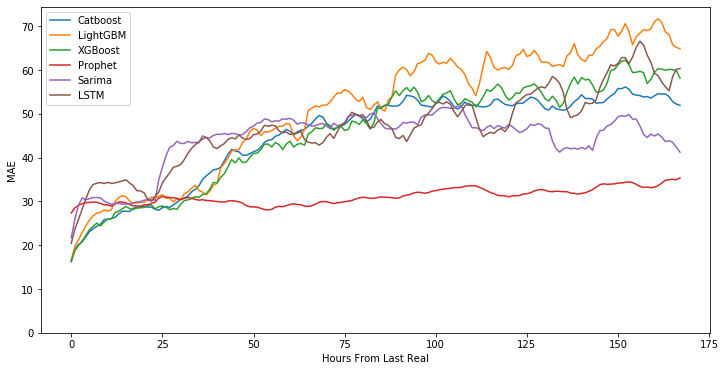

In [15]:
# Now I will get the MAE per lag for a full week
plt.plot(mean_absolute_error(y_week_cat, y_hat_week_cat, multioutput="raw_values"), label="Catboost")
plt.plot(mean_absolute_error(y_week_lgb, y_hat_week_lgb, multioutput="raw_values"), label="LightGBM")
plt.plot(mean_absolute_error(y_week_xgb, y_hat_week_xgb, multioutput="raw_values"), label="XGBoost")
plt.plot(mean_absolute_error(y_week_prophet, y_hat_week_prophet, multioutput="raw_values"), label="Prophet")
# plt.plot(mean_absolute_error(y_week_arima, y_hat_week_arima, multioutput="raw_values"), label="Arima")
plt.plot(mean_absolute_error(y_week_sarima, y_hat_week_sarima, multioutput="raw_values"), label="Sarima")
plt.plot(mean_absolute_error(y_week_lstm, y_hat_week_lstm, multioutput="raw_values"), label="LSTM")
plt.ylim(bottom=0)
plt.legend()
plt.xlabel("Hours From Last Real")
plt.ylabel("MAE")
plt.savefig(r"plots\Magazine\Week_Prediction_Mae_Plot.png", bbox_inches='tight')
plt.show()

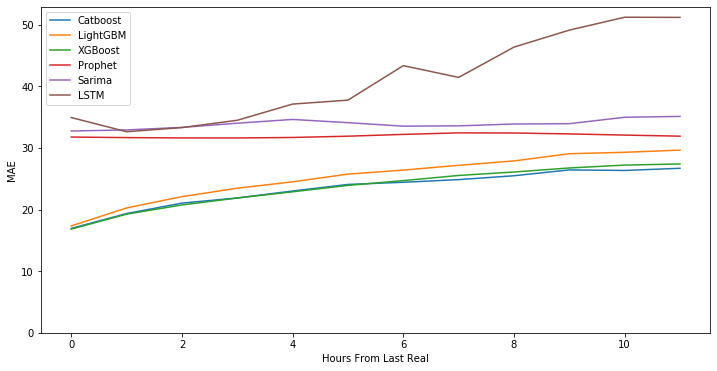

In [16]:
# Now I will get the MAE per lag for 12 Hours without the boosting fix
plt.plot(mean_absolute_error(y_12Hrs_cat, y_hat_12Hrs_cat, multioutput="raw_values"), label="Catboost")
plt.plot(mean_absolute_error(y_12Hrs_lgb, y_hat_12Hrs_lgb, multioutput="raw_values"), label="LightGBM")
plt.plot(mean_absolute_error(y_12Hrs_xgb, y_hat_12Hrs_xgb, multioutput="raw_values"), label="XGBoost")
plt.plot(mean_absolute_error(y_12Hrs_prophet, y_hat_12Hrs_prophet, multioutput="raw_values"), label="Prophet")
# plt.plot(mean_absolute_error(y_12Hrs_arima, y_hat_12Hrs_arima, multioutput="raw_values"), label="Arima")
plt.plot(mean_absolute_error(y_12Hrs_sarima, y_hat_12Hrs_sarima[:,:12], multioutput="raw_values"), label="Sarima")
plt.plot(mean_absolute_error(y_12Hrs_lstm, y_hat_12Hrs_lstm, multioutput="raw_values"), label="LSTM")
plt.ylim(bottom=0)
plt.legend()
plt.xlabel("Hours From Last Real")
plt.ylabel("MAE")
plt.savefig(r"plots\Magazine\12Hrs_Prediction_Mae_Plot.png", bbox_inches='tight')
plt.show()

# Tables

In [10]:
MAE_12Hrs = {
    "Catboost": mean_absolute_error(y_12Hrs_cat, y_hat_12Hrs_cat),
    "LightGBM": mean_absolute_error(y_12Hrs_lgb, y_hat_12Hrs_lgb),
    "XGBoost": mean_absolute_error(y_12Hrs_xgb, y_hat_12Hrs_xgb),
    "Prophet": mean_absolute_error(y_12Hrs_prophet, y_hat_12Hrs_prophet),
    "Arima": mean_absolute_error(y_12Hrs_arima, y_hat_12Hrs_arima),
    "Sarima": mean_absolute_error(y_12Hrs_sarima, y_hat_12Hrs_sarima[:,:12]),
    "LSTM": mean_absolute_error(y_12Hrs_lstm, y_hat_12Hrs_lstm,)
}

MEAN_12Hrs = {
    "Catboost": y_hat_12Hrs_cat.mean(),
    "LightGBM": y_hat_12Hrs_lgb.mean(),
    "XGBoost": y_hat_12Hrs_xgb.mean(),
    "Prophet": y_hat_12Hrs_prophet.mean(),
    "Arima": y_hat_12Hrs_arima.mean(),
    "Sarima": y_hat_12Hrs_arima.mean(),
    "LSTM": y_hat_12Hrs_lstm.mean()
}

STD_12Hrs = {
    "Catboost": y_hat_12Hrs_cat.std(),
    "LightGBM": y_hat_12Hrs_lgb.std(),
    "XGBoost": y_hat_12Hrs_xgb.std(),
    "Prophet": y_hat_12Hrs_prophet.std(),
    "Arima": y_hat_12Hrs_arima.std(),
    "Sarima": y_hat_12Hrs_arima.std(),
    "LSTM": y_hat_12Hrs_lstm.std()
}

RMSE_12Hrs = {
    "Catboost": np.sqrt(mean_squared_error(y_12Hrs_cat, y_hat_12Hrs_cat)),
    "LightGBM": np.sqrt(mean_squared_error(y_12Hrs_lgb, y_hat_12Hrs_lgb)),
    "XGBoost": np.sqrt(mean_squared_error(y_12Hrs_xgb, y_hat_12Hrs_xgb)),
    "Prophet": np.sqrt(mean_squared_error(y_12Hrs_prophet, y_hat_12Hrs_prophet)),
    "Arima": np.sqrt(mean_squared_error(y_12Hrs_arima, y_hat_12Hrs_arima)),
    "Sarima": np.sqrt(mean_squared_error(y_12Hrs_sarima, y_hat_12Hrs_sarima[:,:12])),
    "LSTM": np.sqrt(mean_squared_error(y_12Hrs_lstm, y_hat_12Hrs_lstm))
}

MAE_168Hrs = {
    "Catboost": mean_absolute_error(y_week_cat, y_hat_week_cat),
    "LightGBM": mean_absolute_error(y_week_lgb, y_hat_week_lgb),
    "XGBoost": mean_absolute_error(y_week_xgb, y_hat_week_xgb),
    "Prophet": mean_absolute_error(y_week_prophet, y_hat_week_prophet),
    "Arima": mean_absolute_error(y_week_arima, y_hat_week_arima),
    "Sarima": mean_absolute_error(y_week_sarima, y_hat_week_sarima),
    "LSTM": mean_absolute_error(y_week_lstm, y_hat_week_lstm)
}

RMSE_168Hrs = {
    "Catboost": np.sqrt(mean_squared_error(y_week_cat, y_hat_week_cat)),
    "LightGBM": np.sqrt(mean_squared_error(y_week_lgb, y_hat_week_lgb)),
    "XGBoost": np.sqrt(mean_squared_error(y_week_xgb, y_hat_week_xgb)),
    "Prophet": np.sqrt(mean_squared_error(y_week_prophet, y_hat_week_prophet)),
    "Arima": np.sqrt(mean_squared_error(y_week_arima, y_hat_week_arima)),
    "Sarima": np.sqrt(mean_squared_error(y_week_sarima, y_hat_week_sarima)),
    "LSTM": np.sqrt(mean_squared_error(y_week_lstm, y_hat_week_lstm))
}

MEAN_168Hrs = {
    "Catboost": y_hat_week_cat.mean(),
    "LightGBM": y_hat_week_lgb.mean(),
    "XGBoost": y_hat_week_xgb.mean(),
    "Prophet": y_hat_week_prophet.mean(),
    "Arima": y_hat_week_arima.mean(),
    "Sarima": y_hat_week_arima.mean(),
    "LSTM": y_hat_week_lstm.mean()
}

STD_168Hrs = {
    "Catboost": y_hat_week_cat.std(),
    "LightGBM": y_hat_week_lgb.std(),
    "XGBoost": y_hat_week_xgb.std(),
    "Prophet": y_hat_week_prophet.std(),
    "Arima": y_hat_week_arima.std(),
    "Sarima": y_hat_week_arima.std(),
    "LSTM": y_hat_week_lstm.std()
}


eval_12Hrs = pd.DataFrame([MAE_12Hrs, RMSE_12Hrs, MEAN_12Hrs , STD_12Hrs], index=["MAE", "RMSE", "MEAN", "STD"]).T.sort_values("MAE")
eval_168Hrs = pd.DataFrame([MAE_168Hrs, RMSE_168Hrs, MEAN_168Hrs, STD_168Hrs], index=["MAE", "RMSE", "MEAN", "STD"]).T.sort_values("MAE")

In [11]:
eval_12Hrs

,MAE,RMSE,MEAN,STD
Catboost,23.371369,32.704312,163.099312,102.321872
XGBoost,23.591305,33.270057,163.099312,102.321872
LightGBM,25.231280,35.210025,163.099312,102.321872
Prophet,31.956735,41.979346,163.099312,102.321872
Sarima,33.884065,43.560814,163.099312,102.321872
LSTM,41.060111,56.329340,126.506311,77.611303
Arima,94.451198,114.812688,163.099312,102.321872


In [12]:
eval_168Hrs

,MAE,RMSE,MEAN,STD
Prophet,31.158301,40.309776,165.917252,102.440283
Sarima,44.108337,59.216509,165.917252,102.440283
Catboost,44.906164,59.831549,165.917252,102.440283
XGBoost,45.822976,61.749803,165.917252,102.440283
LSTM,46.886608,64.268478,145.406846,92.029702
LightGBM,50.879445,69.052369,165.917252,102.440283
Arima,86.378079,105.126036,165.917252,102.440283


In [13]:
c2g_data.travels.describe()

count    9932.000000
mean      147.048480
std       110.461143
min         1.000000
25%        47.836812
50%       132.797316
75%       222.250000
max       575.000000
Name: travels, dtype: float64